Importamos las librerias necesarias. Donde resaltamos torch y torchvision para el desarrollo del modelo de Deep Learning.

https://arxiv.org/pdf/1711.06125

https://jayspeidell.github.io/portfolio/project07-galazy-zoo/

https://arxiv.org/pdf/1711.06125

In [20]:
import os
import sys

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

Los datos fueron extraidos desde https://github.com/jayashree2699/Galaxy-Classification

ColumnaSignificadoContexto AstronómicoclassClase Morfológica / Tipo de Galaxia.Es la variable objetivo (la que intentas predecir). En el contexto de Galaxy Zoo, suele indicar si la galaxia es espiral, elíptica, o un objeto de otro tipo.2. Índices de Color (Bandas u, g, r, i, z)Los colores de las galaxias se miden tomando la diferencia de su magnitud (brillo) observada en dos filtros distintos. Estos filtros corresponden a diferentes longitudes de onda (colores del espectro).ColumnaSignificadoContexto Astronómicou-gColor Ultravioleta menos Verde.Indicador clave de la edad estelar y la formación estelar. Un valor bajo (más azul) significa mucha formación estelar reciente (galaxias espirales); un valor alto (más rojo) significa población estelar antigua (galaxias elípticas).g-rColor Verde menos Rojo.Similar al anterior, es un indicador de la población estelar y la extinción (polvo).r-iColor Rojo menos Infrarrojo cercano.Menos sensible a la formación estelar joven y más sensible a la metalicidad (contenido de elementos pesados) y al polvo.i-zColor Infrarrojo cercano.Muy poco afectado por el polvo y la formación estelar. Se relaciona fuertemente con la masa estelar de la galaxia.3. Morfología y Perfil de LuzEstas características describen la forma física y cómo la luz de la galaxia se distribuye.ColumnaSignificadoContexto AstronómicoeccExcentricidadMide cuán alargada es la galaxia. Un valor cercano a 0 indica una forma redonda (típico de galaxias elípticas vistas de frente), y un valor cercano a 1 indica una forma muy aplanada (típico de galaxias espirales vistas de canto).m4_u, m4_g, m4_r, m4_i, m4_zCuarto Momento de la Magnitud (Concentración)Es una medida de la concentración de la luz de la galaxia. Valores más altos indican que la luz está más concentrada hacia el centro. Se utiliza a menudo para distinguir entre galaxias esferoidales/elípticas (muy concentradas) y galaxias de disco/espirales (menos concentradas). Se calcula para diferentes bandas de color.petroR50_R90_u, petroR50_R90_r, petroR50_R90_zRelación de Radio de Petro. (Concentración/Forma)Esta es una relación entre el radio que contiene el 50% de la luz ($R_{50}$) y el radio que contiene el 90% de la luz ($R_{90}$), ambos calculados usando la magnitud de Petrosian. Es el índice de concentración más común:<ul><li>Valores altos (cercanos a 1) indican que la luz está poco concentrada (galaxia de disco/espiral).</li><li>Valores bajos (cercanos a 0.5 o menos) indican que la luz está muy concentrada (galaxia elíptica).</li></ul>Se calcula para diferentes bandas de color (u, r, z).

In [21]:
data = np.load('data/galaxy_catalogue.npy')

nombre_columnas = [
    'class',
    'u-g', 'g-r', 'r-i', 'i-z',
    'ecc', 
    'm4_u', 'm4_g', 'm4_r', 'm4_i', 'm4_z',
    'petroR50_R90_u', 'petroR50_R90_r', 'petroR50_R90_z',
]
datos = pd.DataFrame({
    'class': data['class'],
    'u-g': data['u-g'],
    'g-r': data['g-r'],
    'r-i': data['r-i'],
    'i-z': data['i-z'],
    'ecc': data['ecc'],
    'm4_u': data['m4_u'],
    'm4_g': data['m4_g'],
    'm4_r': data['m4_r'],
    'm4_i': data['m4_i'],
    'm4_z': data['m4_z'],
    'petroR50_R90_u': data['petroR50_u'] / data['petroR90_u'],
    'petroR50_R90_r': data['petroR50_r'] / data['petroR90_r'],
    'petroR50_R90_z': data['petroR50_z'] / data['petroR90_z'],
})

print(datos.head())

    class      u-g      g-r      r-i      i-z       ecc      m4_u      m4_g  \
0  merger  1.85765  0.67158  0.42310  0.30610  0.585428  2.251946  2.339849   
1  merger  1.74259  0.86085  0.44927  0.28851  0.749812  2.031566  2.084156   
2  merger  2.10697  0.96710  0.56810  0.33747  0.630089  1.992887  2.450746   
3  merger  1.22840  0.60446  0.39049  0.28913  0.668999  2.056115  2.182252   
4  merger  1.80792  0.78124  0.45528  0.35067  0.500170  2.259167  2.194723   

       m4_r      m4_i      m4_z  petroR50_R90_u  petroR50_R90_r  \
0  2.380652  2.359738  2.395528        0.598113        0.462170   
1  2.092272  2.124075  2.133154        0.383216        0.416320   
2  2.473116  2.465324  2.438683        0.340249        0.433751   
3  2.309510  2.391414  2.472397        0.378602        0.333005   
4  2.264567  2.334713  2.352568        0.353735        0.322113   

   petroR50_R90_z  
0        0.333373  
1        0.416091  
2        0.307428  
3        0.314361  
4        0.339692  


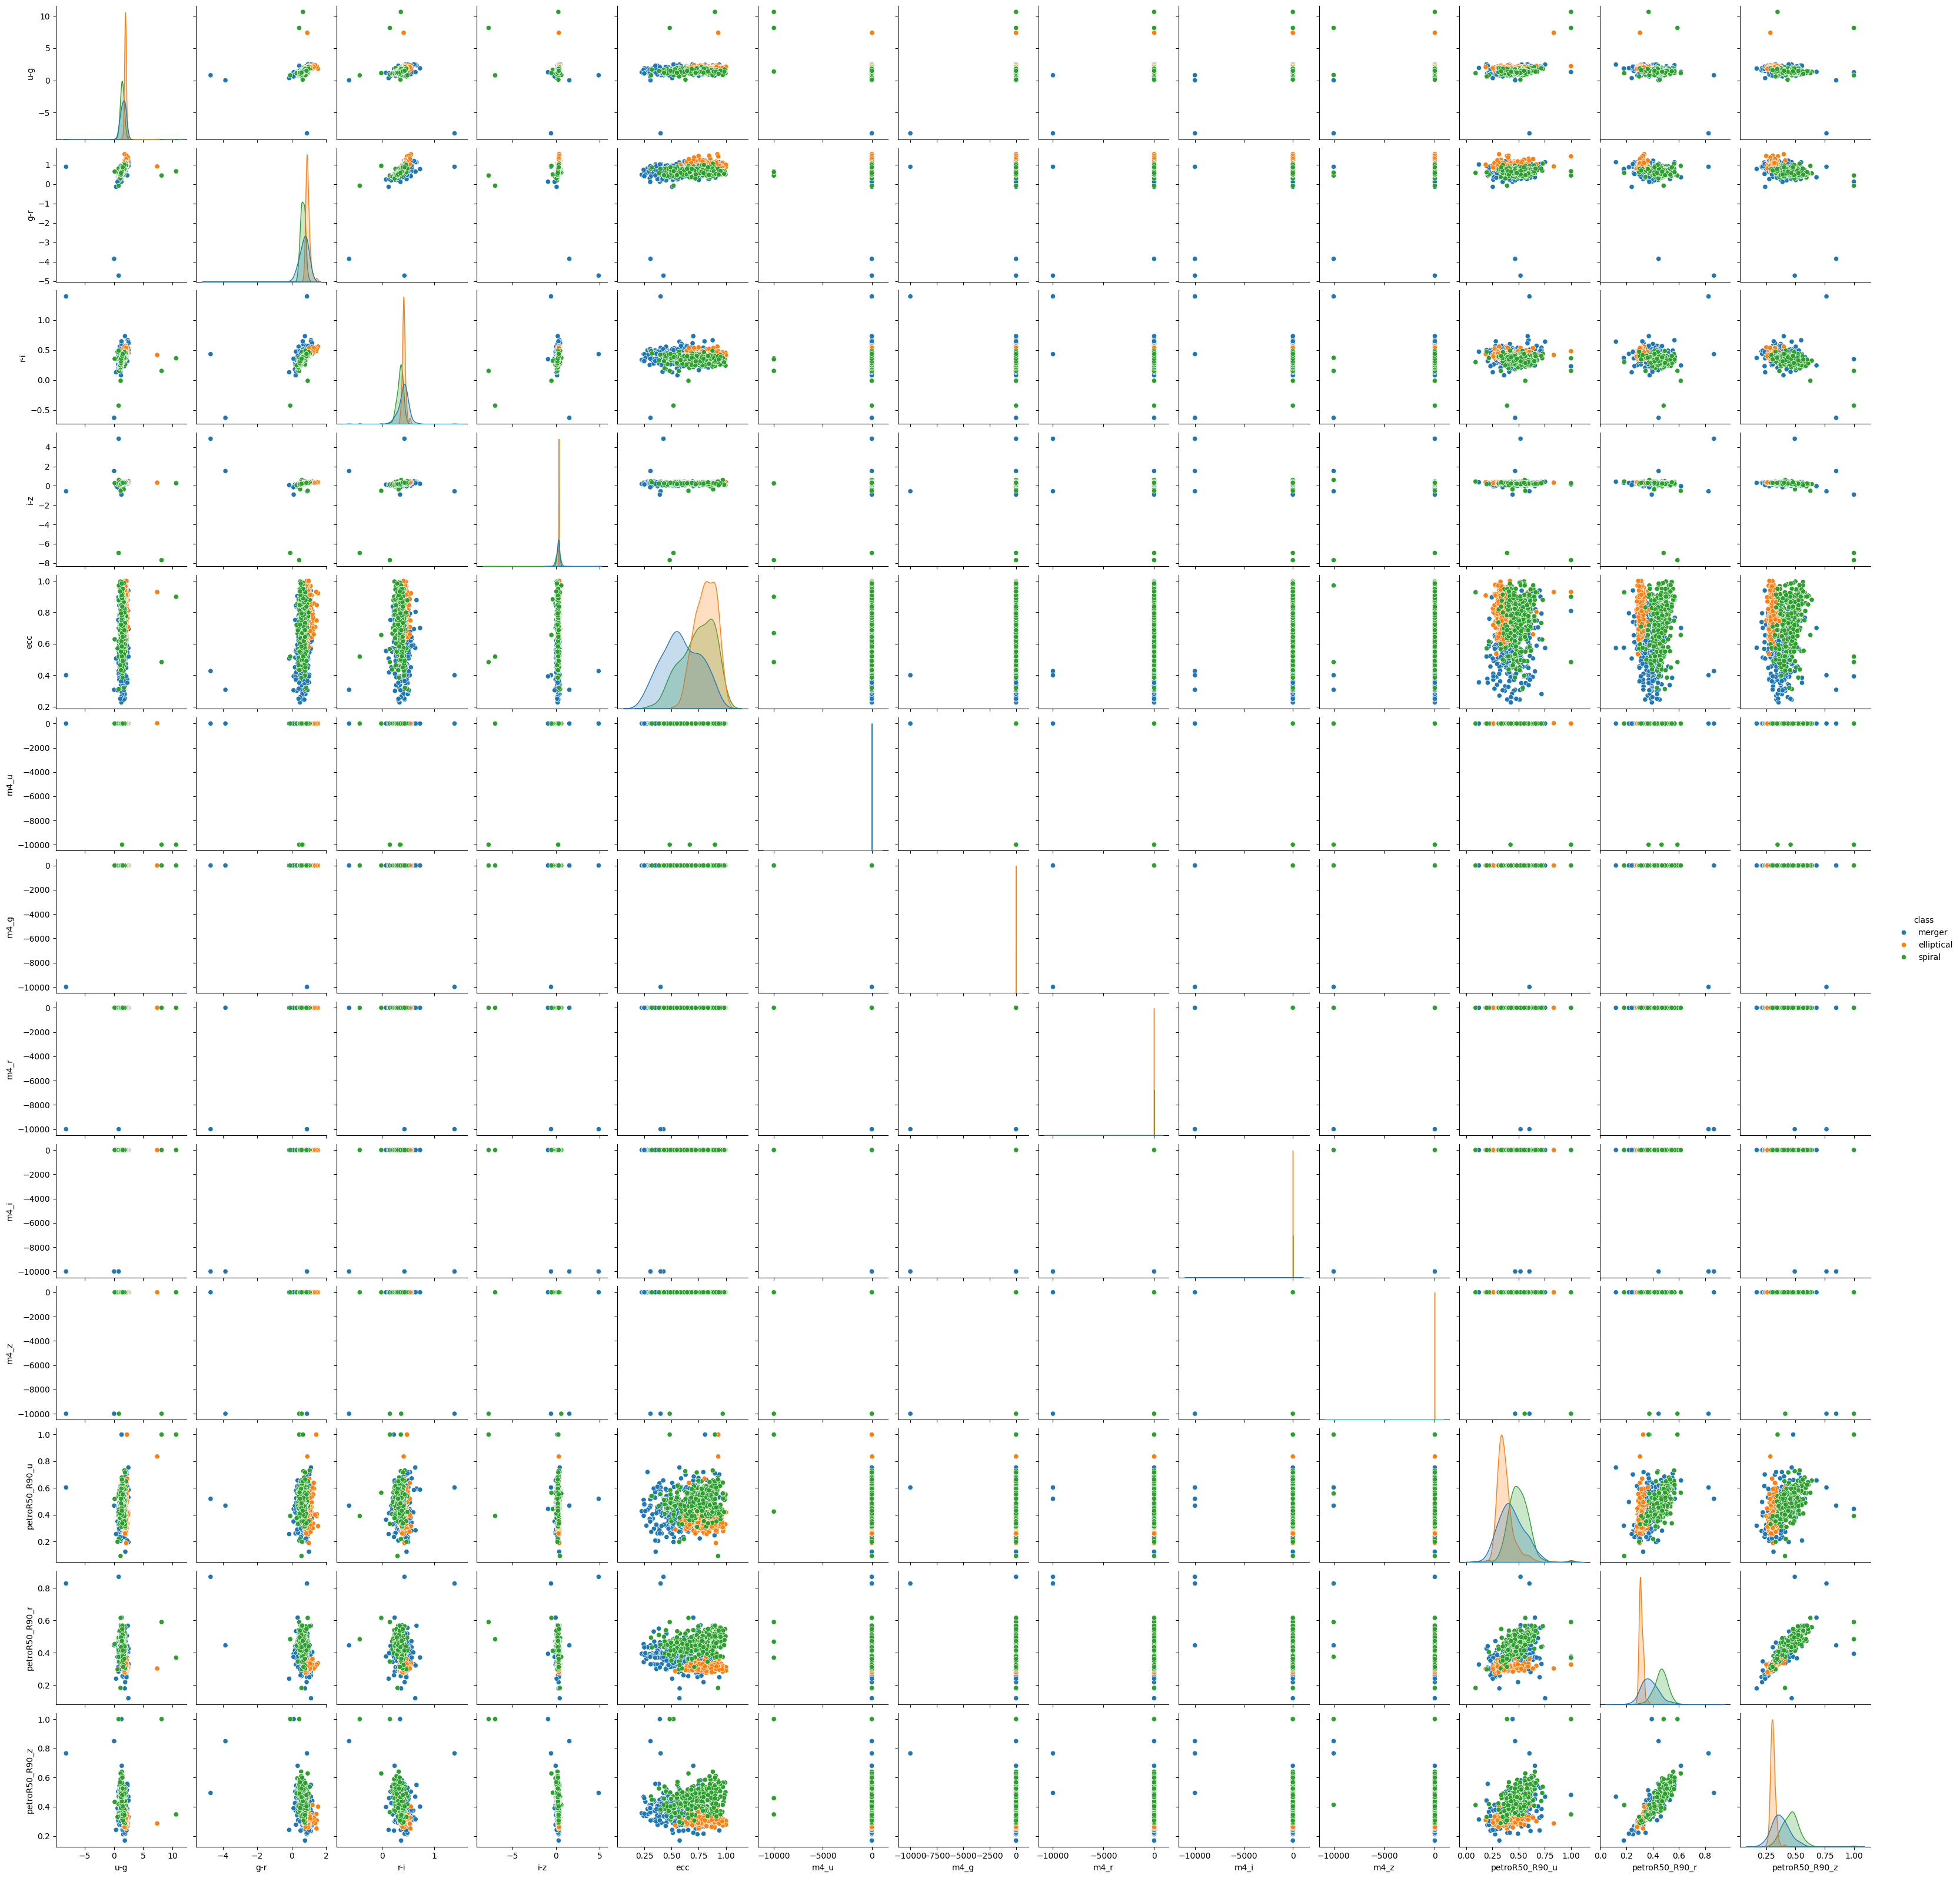

In [22]:
sns.pairplot(datos, hue='class', vars=nombre_columnas[1:])

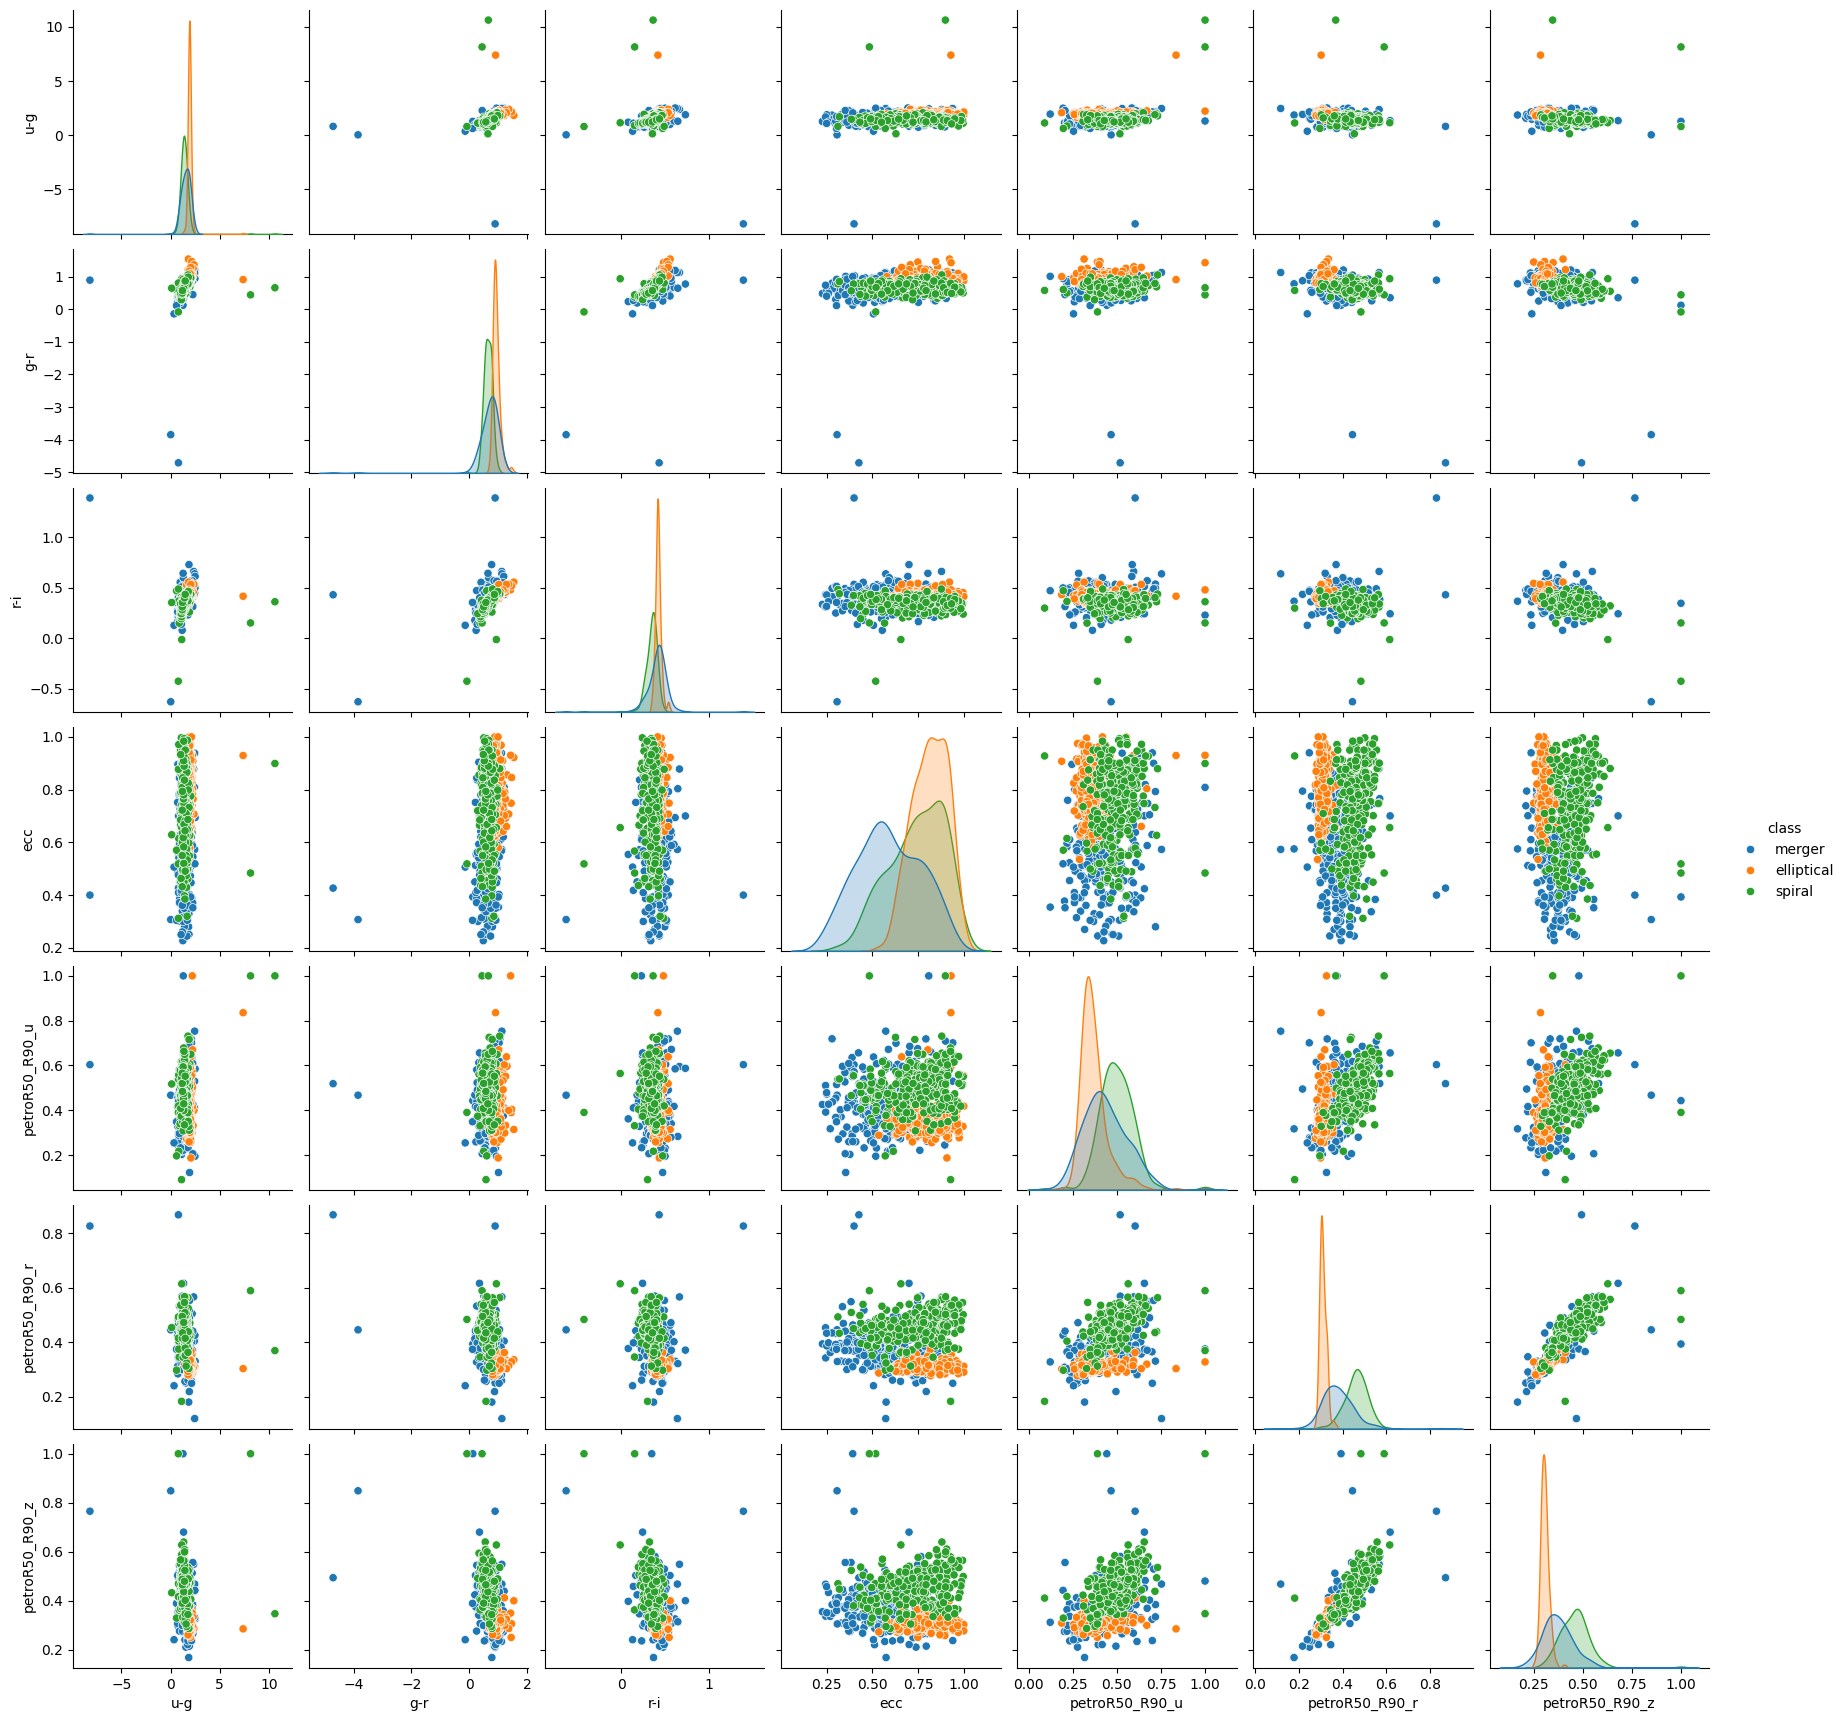

In [23]:
new_datos = datos.drop(columns=['i-z','m4_u', 'm4_g', 'm4_r', 'm4_i', 'm4_z'])
sns.pairplot(new_datos, hue='class', vars=new_datos.columns[1:])

In [24]:
train, test = train_test_split(datos, test_size=0.2, random_state=42, stratify=labels)
train_labels, test_labels = train.pop('class'), test.pop('class')
train_labels

ValueError: Found input variables with inconsistent numbers of samples: [780, 32]

In [ ]:
arbol = DecisionTreeClassifier(max_depth=5, random_state=42)
arbol.fit(train, train_labels)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


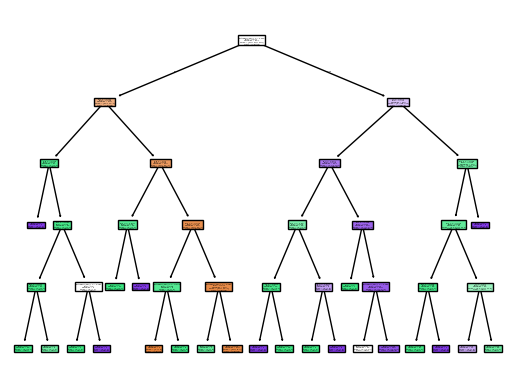

In [ ]:
plot_tree(arbol, feature_names=train.columns, class_names=['Elliptical', 'Spiral', 'Irregular'], filled=True)
plt.savefig('decision_tree.pdf')
plt.show()

In [ ]:
predicciones = arbol.predict(test)

In [ ]:
model_score = accuracy_score(test_labels, predicciones)
print(f'Precision del modelo: {model_score:.4f}')

Precision del modelo: 0.7756


In [ ]:
model_cm = confusion_matrix(test_labels, predicciones)
print('Matriz de confusión:')
print(model_cm)

Matriz de confusión:
[[41 10  1]
 [ 2 41  9]
 [ 3 10 39]]


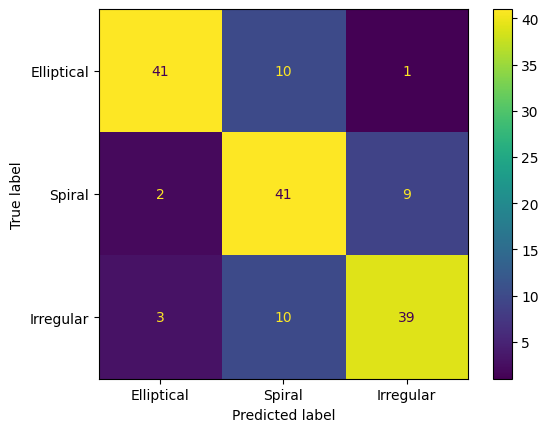

In [ ]:
ConfusionMatrixDisplay(model_cm, display_labels=['Elliptical', 'Spiral', 'Irregular']).plot()

# Deeplearning

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader


import torchvision
from torchvision import transforms
import tqdm

In [ ]:
images = [img for img in os.listdir('data/GalaxyZoo/train_images/') if img.endswith('.jpg')]
print(f'Total images: {len(images)}')

Total images: 61578


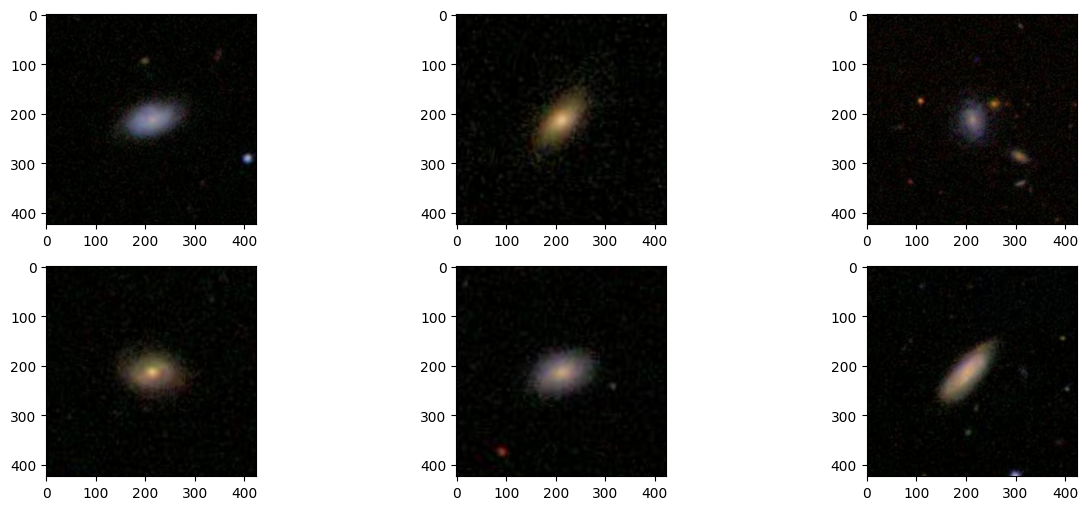

In [38]:
idx_imgs = np.random.randint(0, len(images), size=6)
nrows = 2
ncols = 3
fig, axes = plt.subplots(nrows, ncols, figsize=(15, 6))#, gridspec_kw={'wspace':0, 'hspace':0})
axes_flat = axes.flatten()
for i, idx in enumerate(idx_imgs):
    axes_flat[i].imshow(plt.imread(os.path.join('data/GalaxyZoo/train_images/', images[idx])))
    #axes_flat[i].axis('off')
#fig.tight_layout()

In [39]:
labels = pd.read_csv('data/GalaxyZoo/train_solutions.csv')
labels.GalaxyID = labels.GalaxyID.apply(lambda idx: str(int(idx)) + '.jpg')
print("There are " + '{:,}'.format(labels.shape[0]) + " truth values.")
print("There are " + '{:,}'.format(labels.shape[1]-1) + " categories for classification.")
desc = [
    'Smooth','Featured or disc','Star or artifact','Edge on','Not edge on','Bar through center','No bar',
    'Spiral','No Spiral','No bulge','Just noticeable bulge','Obvious bulge','Dominant bulge','Odd Feature','No Odd Feature',
    'Completely round','In between','Cigar shaped','Ring (Oddity)','Lens or arc (Oddity)','Disturbed (Oddity)',
    'Irregular (Oddity)','Other (Oddity)','Merger (Oddity)','Dust lane (Oddity)','Rounded bulge','Boxy bulge',
    'No bulge','Tightly wound arms','Medium wound arms','Loose wound arms','1 Spiral Arm','2 Spiral Arms',
    '3 Spiral Arms','4 Spiral Arms','More than four Spiral Arms',"Can't tell"
]

There are 61,578 truth values.
There are 37 categories for classification.


In [40]:
X, X_val, y, y_val = train_test_split(
    labels.GalaxyID,
    labels[labels.columns[1:]],
    test_size=0.2,
    random_state=42,
)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)

print("Training set: %d" % X_train.shape[0])
print("Testing set: %d" % X_test.shape[0])
print("Validation set: %d" % X_val.shape[0])

Training set: 39409
Testing set: 9853
Validation set: 12316


In [64]:
data_transform = transforms.Compose([
    # Convertir la imagen a un tensor
    transforms.ToTensor(),  
    # Cambiar el tamaño de las imágenes a 64x64 píxeles
    transforms.Resize(size = (64, 64)),  
    # Escala de grises
    transforms.Grayscale(num_output_channels=1),
    # Normalización min-max
    transforms.Lambda(lambda x: (x - x.min()) / (x.max() - x.min()))
])

In [65]:
class GalaxyDataset(Dataset):
    def __init__(self, image_ids, labels, img_dir, transform=None):
        self.image_ids = image_ids
        self.labels = labels
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.image_ids)

    def __getitem__(self, idx):
        img_name = os.path.join(self.img_dir, self.image_ids.iloc[idx])
        image = plt.imread(img_name)
        label = torch.tensor(self.labels.iloc[idx].values, dtype=torch.float32)

        if self.transform:
            image = self.transform(image)

        return image, label

In [66]:
train_dataset_transform = GalaxyDataset(X_train, y_train, img_dir='data/GalaxyZoo/train_images/', transform=data_transform)
trainloader_transform = DataLoader(train_dataset_transform, batch_size=32, shuffle=True, num_workers=4)

train_dataset = GalaxyDataset(X_train, y_train, img_dir='data/GalaxyZoo/train_images/')
trainloader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)

Image shape: (424, 424, 3)
Transformed image shape: torch.Size([1, 64, 64])


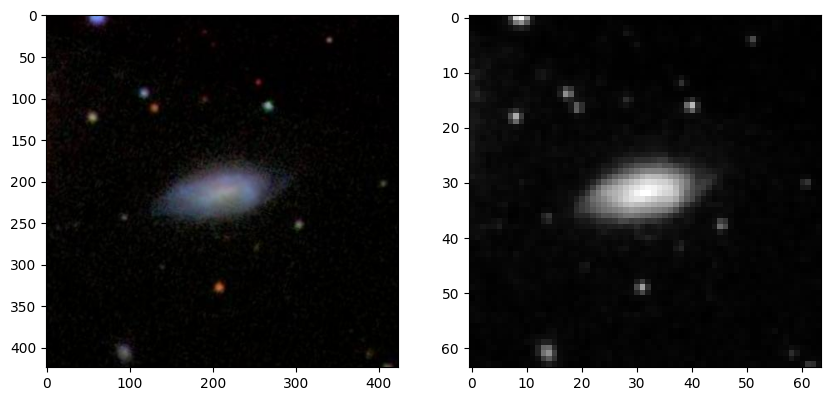

In [67]:
image , label = train_dataset[0]
print(f'Image shape: {image.shape}')

image_transformed , label_transformed = train_dataset_transform[0]
print(f'Transformed image shape: {image_transformed.shape}')

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image)
ax[1].imshow(image_transformed.permute(1, 2, 0), cmap='gray')

In [78]:
image_transformed.max(), image_transformed.min()

(tensor(1.), tensor(0.))

In [79]:
image.min(), image.max()

(np.uint8(0), np.uint8(255))

Desarrollado por la universidad de Oxford en 2014

In [80]:
class TinyVGG(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        
        """
        Aca se genera el modelo de deep learning usando solo Convolutional Neural Networks (CNN).
        Es algo sencillo.
        """
        
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(hidden_units * 16 * 16, hidden_units),
        )
        

    def forward(self, x):
        
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
    
        return x
torch.manual_seed(42)
model = TinyVGG(input_shape=1, hidden_units=16, output_shape=10)
model

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=4096, out_features=16, bias=True)
  )
)

In [81]:
label

tensor([0.3785, 0.5890, 0.0324, 0.1198, 0.4693, 0.2169, 0.2524, 0.2152, 0.2541,
        0.3368, 0.0976, 0.0349, 0.0000, 0.2813, 0.7187, 0.0000, 0.2463, 0.1322,
        0.0000, 0.0000, 0.0352, 0.2461, 0.0000, 0.0000, 0.0000, 0.0399, 0.0000,
        0.0799, 0.0308, 0.1229, 0.0615, 0.0000, 0.0923, 0.0000, 0.0000, 0.0000,
        0.1229])

In [83]:
NUM_EPOCHS = 5

model = TinyVGG(
    input_shape=1,
    hidden_units=16,
    output_shape=10
)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

model.train()
for epoch in range(NUM_EPOCHS):
    train_loss, train_acc = 0, 0
    
    for images, labels in tqdm.tqdm(trainloader_transform):
       
        
        y_pred = model(images)
        loss = loss_fn(y_pred, labels.argmax(dim=1))
        train_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        #train_acc += (y_pred_class == labels).sum().item()
        
    train_loss /= len(trainloader_transform)
    #train_acc /= len(trainloader_transform.dataset)
    print(f'Epoch {epoch+1}/{NUM_EPOCHS}, Loss: {train_loss:.4f}, Accuracy: {train_acc:.4f}')

100%|██████████| 1232/1232 [02:54<00:00,  7.06it/s]


Epoch 1/5, Loss: 0.9809, Accuracy: 0.0000


100%|██████████| 1232/1232 [02:51<00:00,  7.16it/s]


Epoch 2/5, Loss: 0.8849, Accuracy: 0.0000


100%|██████████| 1232/1232 [02:55<00:00,  7.01it/s]


Epoch 3/5, Loss: 0.8387, Accuracy: 0.0000


100%|██████████| 1232/1232 [02:53<00:00,  7.09it/s]


Epoch 4/5, Loss: 0.7794, Accuracy: 0.0000


100%|██████████| 1232/1232 [02:53<00:00,  7.11it/s]

Epoch 5/5, Loss: 0.7298, Accuracy: 0.0000


In [84]:
model.eval()
test_loss, test_acc = 0, 0
with torch.inference_mode():
    for images, labels in tqdm.tqdm(trainloader_transform):
        y_pred = model(images)
        loss = loss_fn(y_pred, labels.argmax(dim=1))
        test_loss += loss.item()
        
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        test_acc += (y_pred_class == labels.argmax(dim=1)).sum().item()
        
    test_loss /= len(trainloader_transform)
    test_acc /= len(trainloader_transform.dataset)
    print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}')

100%|██████████| 1232/1232 [02:44<00:00,  7.51it/s]

Test Loss: 0.6961, Test Accuracy: 0.7205


In [92]:
y_pred = torch.argmax(torch.softmax(model.forward(next(iter(trainloader_transform))[0]), dim=1), dim=1)[0]

In [97]:
image, label = next(iter(trainloader_transform))

Text(0.5, 1.0, 'Origina class1 | Predicted class: 14')

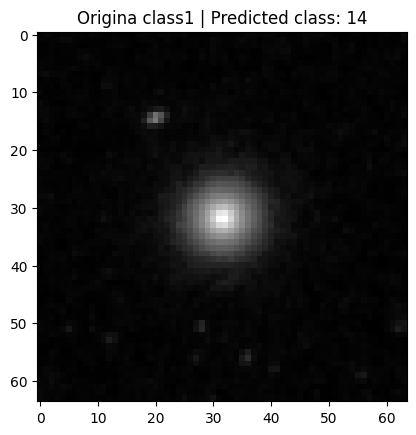

In [100]:
plt.imshow(next(iter(trainloader_transform))[0][0].permute(1, 2, 0), cmap='gray')
plt.title(f'Origina class{torch.argmax(label[0])} | Predicted class: {y_pred.item()}')


In [75]:
for epoch in tqdm.tqdm(range(2)):  # loop over the dataset multiple times
    model.train()
    epoca_loss = 0.0
    train_loss, train_acc = 0.0 , 0.0

    for batch in trainloader_transform:
        inputs, labels = batch
        
        optimizer.zero_grad()
        output = model(inputs)
        loss_value = loss(output, labels)
        loss_value.backward()
        optimizer.step()
        
        #train_loss += loss_value.item()
        
        train_loss.append(loss_value.item())
    #epoca_loss = train_loss / len(trainloader)
    epoca_loss = np.mean(train_loss)
    print(f'Epoch {epoch+1}, Loss: {epoca_loss:.4f}')
    


  0%|          | 0/2 [00:01<?, ?it/s]


RuntimeError: shape '[-1, 100352]' is invalid for input of size 262144